# Transfer Learning VGG16 using Keras

In [58]:
import numpy as np
from glob import glob
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


In [59]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x=Flatten()(vgg16.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)


In [9]:
model=Model(inputs=vgg16.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\niraj\AppData\Local\Temp\ipykernel_2012\4130870686.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20


61/61 [==============================] - 605s 10s/step - loss: 0.7838 - accuracy: 0.7355 - val_loss: 0.2844 - val_accuracy: 0.8868
Epoch 2/20
61/61 [==============================] - 556s 9s/step - loss: 0.2229 - accuracy: 0.9262 - val_loss: 0.2540 - val_accuracy: 0.9057
Epoch 3/20
61/61 [==============================] - 553s 9s/step - loss: 0.1707 - accuracy: 0.9390 - val_loss: 0.2032 - val_accuracy: 0.9057
Epoch 4/20
61/61 [==============================] - 553s 9s/step - loss: 0.1503 - accuracy: 0.9457 - val_loss: 0.1585 - val_accuracy: 0.9340
Epoch 5/20
61/61 [==============================] - 553s 9s/step - loss: 0.1107 - accuracy: 0.9677 - val_loss: 0.1330 - val_accuracy: 0.9434
Epoch 6/20
61/61 [==============================] - 562s 9s/step - loss: 0.1005 - accuracy: 0.9692 - val_loss: 0.2465 - val_accuracy: 0.9057
Epoch 7/20
61/61 [==============================] - 566s 9s/step - loss: 0.0884 - accuracy: 0.9723 - val_loss: 0.1219 - val_accuracy: 0.9340
Epoch 8/20

In [16]:
 import matplotlib.pyplot as plt

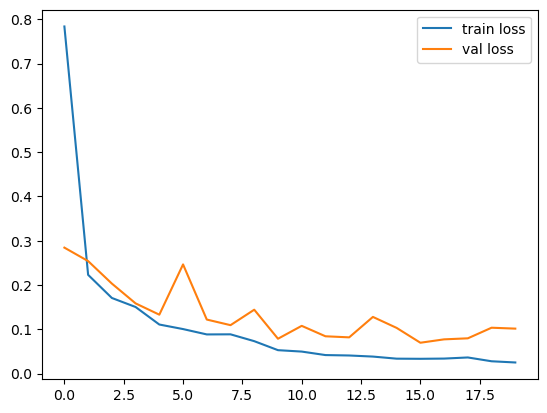

<Figure size 640x480 with 0 Axes>

In [17]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

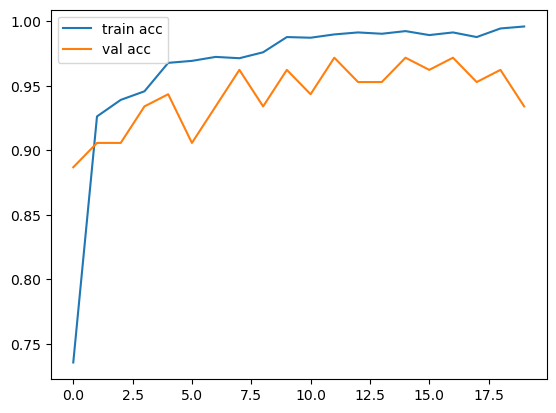

<Figure size 640x480 with 0 Axes>

In [18]:
#plot the Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

In [19]:
#save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_vgg16.h5')

C:\Users\niraj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
y_pred=model.predict(test_set)

4/4 [==============================] - 41s 7s/step


In [21]:
y_pred

array([[2.30258593e-04, 2.33665614e-05, 9.98670459e-01, 1.07597234e-03],
       [1.29385371e-04, 4.34669225e-08, 9.99868035e-01, 2.47168487e-06],
       [9.58795130e-01, 4.11281511e-02, 3.66634013e-05, 4.00498720e-05],
       [9.99936461e-01, 1.21174111e-07, 6.33952150e-05, 5.49636514e-09],
       [1.64588520e-04, 2.40152538e-01, 1.05562467e-05, 7.59672344e-01],
       [4.90152044e-03, 2.67932005e-03, 2.83892895e-03, 9.89580333e-01],
       [3.37541550e-01, 1.11384375e-03, 6.30458355e-01, 3.08862440e-02],
       [7.88387915e-05, 6.96820533e-03, 6.87473221e-04, 9.92265522e-01],
       [2.27241500e-04, 3.34421275e-05, 9.71304459e-09, 9.99739230e-01],
       [8.08028562e-06, 1.62091770e-03, 2.95123773e-05, 9.98341441e-01],
       [5.77154897e-05, 9.96190667e-01, 1.12301634e-04, 3.63923050e-03],
       [5.22767805e-05, 9.99343216e-01, 2.59157805e-05, 5.78630017e-04],
       [5.44436989e-06, 9.82364833e-01, 5.26436816e-06, 1.76244639e-02],
       [9.97094154e-01, 5.87614579e-08, 2.90501420e

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 2, 0, 0, 3, 3, 2, 3, 3, 3, 1, 1, 1, 0, 0, 0, 1, 3, 2, 1, 3, 1,
       2, 3, 2, 1, 1, 3, 1, 1, 0, 3, 1, 1, 3, 0, 2, 0, 0, 1, 3, 3, 3, 2,
       0, 2, 1, 0, 3, 0, 2, 1, 0, 2, 1, 2, 3, 1, 1, 3, 1, 0, 3, 3, 0, 3,
       0, 0, 0, 2, 2, 2, 1, 3, 2, 2, 3, 0, 1, 3, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 3, 1, 2, 2, 1, 3, 3, 3, 3, 3, 0, 2, 3, 0, 0, 2, 2], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [47]:
model=load_model('model_vgg16.h5')

In [30]:
img=image.load_img('Datasets/test/fresh cotton leaf/d (122)_iaip.jpg', target_size=(224, 224))

In [31]:
x=image.img_to_array(img)

In [32]:
x

array([[[148., 187., 130.],
        [147., 187., 127.],
        [166., 206., 143.],
        ...,
        [ 55.,  49.,  35.],
        [ 52.,  46.,  32.],
        [ 53.,  47.,  33.]],

       [[146., 185., 128.],
        [145., 185., 125.],
        [165., 205., 142.],
        ...,
        [ 62.,  56.,  42.],
        [ 58.,  52.,  38.],
        [ 68.,  62.,  48.]],

       [[149., 188., 131.],
        [148., 188., 128.],
        [168., 208., 145.],
        ...,
        [ 67.,  61.,  47.],
        [ 63.,  57.,  43.],
        [ 61.,  55.,  41.]],

       ...,

       [[155., 183., 108.],
        [161., 189., 112.],
        [174., 203., 121.],
        ...,
        [114., 160.,  88.],
        [116., 162.,  90.],
        [122., 168.,  96.]],

       [[154., 183., 101.],
        [149., 178.,  96.],
        [161., 190., 108.],
        ...,
        [110., 155.,  90.],
        [121., 167.,  95.],
        [122., 168.,  96.]],

       [[157., 186., 104.],
        [134., 163.,  81.],
        [148., 1

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [37]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [61]:
import numpy as np
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 1, 1, 1, 1, 1, 224, 224, 3)

In [56]:
img_data

array([[[[[[[-123.09961 , -116.04567 , -103.4292  ],
            [-123.10353 , -116.04567 , -103.44096 ],
            [-123.02902 , -115.97115 , -103.37822 ],
            ...,
            [-123.46432 , -116.586845, -103.80175 ],
            [-123.47608 , -116.59861 , -103.813515],
            [-123.47216 , -116.59469 , -103.80959 ]],

           [[-123.10745 , -116.05351 , -103.43704 ],
            [-123.111374, -116.05351 , -103.44881 ],
            [-123.03294 , -115.975075, -103.38214 ],
            ...,
            [-123.43687 , -116.559395, -103.7743  ],
            [-123.45255 , -116.57508 , -103.789986],
            [-123.41333 , -116.535866, -103.75077 ]],

           [[-123.09569 , -116.04175 , -103.42528 ],
            [-123.09961 , -116.04175 , -103.43704 ],
            [-123.02118 , -115.96331 , -103.37038 ],
            ...,
            [-123.41725 , -116.53979 , -103.75469 ],
            [-123.432945, -116.55547 , -103.77038 ],
            [-123.44079 , -116.56332 , -103.